# Fitting a Logistic Regression Model on a High-Dimensional Dataset

<b> Implement all steps from Exercise 14.01 until the normalization of data. Derive the transformed independent X_tran variable </b>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter14/Dataset/ad.data'

In [3]:
adData = pd.read_csv(url_path, header=None, error_bad_lines=False)
adData.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [4]:
X = adData.loc[:, 0:1557]
Y = adData[1558]

In [5]:
print(X.shape)
print(Y.shape)

(3279, 1558)
(3279,)


In [6]:
for i in range(0,3):
    X[i] = X[i].str.replace("?", 'NaN').values.astype(float)

In [7]:
for i in range(3,1557):
    X[i] = X[i].replace("?", 'NaN').values.astype(float)

In [8]:
for i in range(0,1557):
    X[i] = X[i].fillna(X[i].mean())

In [9]:
scaler = MinMaxScaler()
X_tran = pd.DataFrame(scaler.fit_transform(X))

<b> Create a high-dimensional dataset by replicating the columns 80 times using the pd.np.tile() function. Print the shape of the new dataset and observe the number of features in the new dataset </b>

In [10]:
X_hd = pd.DataFrame(pd.np.tile(X_tran, (1, 80)))
X_hd.shape

(3279, 155800)

<b> Split the dataset into train and test sets </b>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_hd, Y, test_size=0.3, random_state=123)

<b> Fit a logistic regression model on the new dataset and note the time it takes to fit the model </b>

In [12]:
%%time
model = LogisticRegression()
model.fit(X_train, y_train)

Wall time: 1min 24s
Parser   : 270 ms


LogisticRegression()

<b> Predict on the test set and print the classification report and confusion matrix </b>

In [13]:
pred = model.predict(X_test)

In [14]:
print(f'Accuracy on Logistic Regression model prediction on test set: {model.score(X_test, y_test)}')

Accuracy on Logistic Regression model prediction on test set: 0.9715447154471545


In [15]:
print(confusion_matrix(y_test, pred))

[[110  16]
 [ 12 846]]


In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       0.90      0.87      0.89       126
      nonad.       0.98      0.99      0.98       858

    accuracy                           0.97       984
   macro avg       0.94      0.93      0.94       984
weighted avg       0.97      0.97      0.97       984



# Comparison of Dimensionality Reduction Techniques on the Enhanced Ads Dataset

<b> Create a high-dimensional dataset by replicating the columns twice </b>

In [17]:
X_hd = pd.DataFrame(pd.np.tile(X_tran, (1, 2)))
X_hd.shape

(3279, 3116)

<b> Create random samples from a normal distribution with mean = 0 and standard deviation = 0.1. Make the new dataset with the same shape as the high-dimensional dataset </b>

In [18]:
# defining mean and standard deviation
mu = 0
sigma = 0.1

In [19]:
# Generate samples from the normal distribution
noise = np.random.normal(mu, sigma, [3279, 3116])
noise.shape

(3279, 3116)

<b> Add the high dimensional dataset and the random samples to get the new dataset </b>

In [20]:
X_new = X_hd + noise

<b> Split the dataset into train and test sets </b>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=123)

<b> Implement backward elimination </b>

In [22]:
from sklearn.feature_selection import RFE

In [23]:
backModel = LogisticRegression()
rfe = RFE(backModel, 300)

In [24]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=300)

In [25]:
rfe.get_support(indices=True)

array([   1,   12,   14,   35,   53,   64,   73,   75,   88,   95,   98,
         99,  119,  130,  134,  141,  158,  163,  166,  167,  172,  246,
        251,  262,  271,  278,  284,  307,  317,  322,  338,  341,  351,
        356,  365,  372,  380,  398,  402,  418,  424,  441,  457,  499,
        508,  515,  541,  543,  556,  562,  593,  610,  638,  658,  679,
        680,  686,  692,  698,  705,  709,  715,  717,  719,  721,  726,
        731,  736,  737,  766,  769,  785,  803,  813,  815,  831,  840,
        850,  860,  863,  865,  866,  874,  887,  910,  917,  937,  950,
        968,  982,  983,  988,  999, 1000, 1002, 1004, 1021, 1023, 1034,
       1035, 1043, 1060, 1081, 1106, 1107, 1111, 1134, 1146, 1147, 1167,
       1184, 1196, 1202, 1203, 1210, 1229, 1243, 1247, 1249, 1256, 1271,
       1276, 1288, 1292, 1306, 1309, 1310, 1326, 1327, 1339, 1344, 1346,
       1351, 1357, 1359, 1380, 1385, 1388, 1399, 1403, 1409, 1417, 1424,
       1434, 1437, 1445, 1454, 1465, 1471, 1478, 14

In [26]:
X_train_trans = rfe.transform(X_train)
X_test_trans = rfe.transform(X_test)

In [27]:
RfeModel = LogisticRegression()
RfeModel.fit(X_train_trans, y_train)

LogisticRegression()

In [28]:
# make prediction
pred = RfeModel.predict(X_test_trans)

In [29]:
# calculate the accuracy's model
print(f'Accuracy of Logistic Regression model: {RfeModel.score(X_test_trans, y_test)}')

Accuracy of Logistic Regression model: 0.9644308943089431


In [30]:
# confusion matrix
print(confusion_matrix(y_test, pred))

[[ 95  31]
 [  4 854]]


In [31]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       0.96      0.75      0.84       126
      nonad.       0.96      1.00      0.98       858

    accuracy                           0.96       984
   macro avg       0.96      0.87      0.91       984
weighted avg       0.96      0.96      0.96       984



<b> Implement the forward selection technique </b>

In [32]:
from sklearn.feature_selection import SelectKBest

In [33]:
feats = SelectKBest(k=300)

In [34]:
fit = feats.fit(X_train, y_train)

In [35]:
features_train = fit.transform(X_train)
features_test = fit.transform(X_test)

In [36]:
forwardModel = LogisticRegression()
forwardModel.fit(features_train, y_train)

LogisticRegression()

In [37]:
# make predictions
pred = forwardModel.predict(features_test)

In [38]:
# accuracy's model
print(f'Accuracy of the Logistic Regression model: {forwardModel.score(features_test, y_test)}')

Accuracy of the Logistic Regression model: 0.9623983739837398


In [39]:
# confusion matrix
print(confusion_matrix(y_test, pred))

[[ 90  36]
 [  1 857]]


In [40]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       0.99      0.71      0.83       126
      nonad.       0.96      1.00      0.98       858

    accuracy                           0.96       984
   macro avg       0.97      0.86      0.90       984
weighted avg       0.96      0.96      0.96       984



<b> Implement PCA </b>

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA().fit(X_train, y_train)

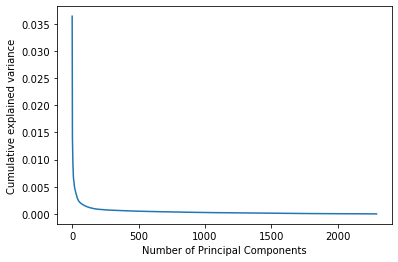

In [43]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [44]:
pca = PCA(n_components=300).fit(X_train)

In [45]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [46]:
pcaModel = LogisticRegression()
pcaModel.fit(X_train_pca, y_train)

LogisticRegression()

In [47]:
pred = pcaModel.predict(X_test_pca)

In [49]:
# accuracy's model
print(f'Accuracy of the Logistic Regression model: {pcaModel.score(X_test_pca, y_test)}')

Accuracy of the Logistic Regression model: 0.9684959349593496


In [50]:
# confusion matrix
print(confusion_matrix(y_test, pred))

[[ 97  29]
 [  2 856]]


In [51]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       0.98      0.77      0.86       126
      nonad.       0.97      1.00      0.98       858

    accuracy                           0.97       984
   macro avg       0.97      0.88      0.92       984
weighted avg       0.97      0.97      0.97       984



<b> Implement ICA </b>

In [53]:
from sklearn.decomposition import FastICA

In [54]:
ICA = FastICA(n_components=300, random_state=123)

In [55]:
X_train_ica = ICA.fit_transform(X_train)

In [56]:
X_test_ica = ICA.transform(X_test)

In [57]:
icaModel = LogisticRegression()
icaModel.fit(X_train_ica, y_train)

LogisticRegression()

In [58]:
pred = icaModel.predict(X_test_ica)

In [59]:
# accuracy's model
print(f'Accuracy of the Logistic Regression model: {icaModel.score(X_test_ica, y_test)}')

Accuracy of the Logistic Regression model: 0.8719512195121951


In [60]:
# confusion matrix
print(confusion_matrix(y_test, pred))

[[  0 126]
 [  0 858]]


In [61]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       0.00      0.00      0.00       126
      nonad.       0.87      1.00      0.93       858

    accuracy                           0.87       984
   macro avg       0.44      0.50      0.47       984
weighted avg       0.76      0.87      0.81       984



<b> Implement factor analysis </b>

In [63]:
from sklearn.decomposition import FactorAnalysis

In [69]:
fa = FactorAnalysis(n_components=30, random_state=123)

In [70]:
X_train_fa = fa.fit_transform(X_train)
X_test_fa = fa.transform(X_test)

In [82]:
faModel = LogisticRegression()

In [83]:
faModel.fit(X_train_fa, y_train)

LogisticRegression()

In [84]:
pred = faModel.predict(X_test_fa)

In [85]:
# accuracy's model
print(f'Accuracy of the Logistic Regression model: {faModel.score(X_test_fa, y_test)}')

Accuracy of the Logistic Regression model: 0.959349593495935


In [86]:
# confusion matrix
print(confusion_matrix(y_test, pred))

[[ 86  40]
 [  0 858]]


In [87]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       1.00      0.68      0.81       126
      nonad.       0.96      1.00      0.98       858

    accuracy                           0.96       984
   macro avg       0.98      0.84      0.89       984
weighted avg       0.96      0.96      0.96       984



<b> Compare the outputs of all the methods </b>

We can see that three methods (backward elimination, forward selection, and PCA) have got the same accuracy scores. Therefore, the selection criteria for the best method should be based on the time taken to get the reduced dimension.

We should strike a balance between accuracy and the time taken for dimensionality reduction. We can see that factor analysis and backward elimination have very close accuracy scores, 96% and 97% respectively.